In [210]:
# This modeling code is based on the tutorial script here:
# https://colab.research.google.com/drive/1Y4o3jh3ZH70tl6mCd76vz_IxX23biCPP

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [213]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [214]:
!pip install transformers
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split


In [215]:
tweets_data = pd.read_csv('/content/drive/My Drive/DS_week8/BERT/sentiment_12000.csv')
data_train, data_test = train_test_split(tweets_data, test_size=0.2, random_state=0)

# Reset index
data_train = data_train.set_index(pd.Index(range(0,len(data_train))))
data_test = data_test.set_index(pd.Index(range(0,len(data_test))))

# Save the dataset
data_train.to_csv('Train.csv',index=False)
data_test.to_csv('Test.csv',index=False)

In [216]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/Train.csv")

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 2,000



,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,hashtags/0,links/0,hashtags/1,hashtags/2,reply_to_users/0/screen_name,reply_to_users/0/user_id,img_urls/0,hashtags/3,hashtags/4,hashtags/5,hashtags/6,img_urls/1,img_urls/2,img_urls/3,reply_to_users/1/screen_name,reply_to_users/1/user_id,reply_to_users/2/screen_name,reply_to_users/2/user_id,hashtags/7,hashtags/8,hashtags/9,links/1,hashtags/10,hashtags/11,hashtags/12,hashtags/13,hashtags/14,hashtags/15,hashtags/16,hashtags/17,hashtags/18,hashtags/19,hashtags/20,hashtags/21,hashtags/22,hashtags/23,links/2,links/3,links/4,hashtags/24,hashtags/25,hashtags/26,hashtags/27,hashtags/28,hashtags/29,clean_text,sentences_tone,document_tones,joy,confident,analytical,sadness,tentative,fear,anger
452,False,"[""COVID19""]",[],True,False,6,[],NaN,1.0,[],0.0,icedoc61,Today I attended my friend’s funeral via zoom....,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-09T23:53:08,1.589068e+09,1.259270e+18,/icedoc61/status/1259270210009411584,9.201643e+17,Sotirios Kassapidis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Today I attended my friend’s funeral via zoom....,"[{'sentence_id': 0, 'text': 'Today I attended ...","[{'score': 0.937736, 'tone_id': 'sadness', 'to...",NaN,1.0,NaN,1.0,NaN,NaN,NaN
361,False,NaN,NaN,False,False,1,NaN,NaN,0.0,NaN,1.0,10WallStreet,I Agree with #RandPaul. #Covid19 is a Nasty Fl...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-12T23:59:54,1.589328e+09,1.260359e+18,/10WallStreet/status/1260359074157395972,7.830467e+08,@10WallStreet,NaN,RandPaul,NaN,Covid19,CoronaVirus,NaN,NaN,NaN,msnbc,foxnews,nytimes,cnn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wsj,cnbc,politico,NaN,huffpost,drudge,bbc,gop,npr,dailykos,wapo,nbc,cbs,ap,slate,aarp,fauci,cdc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I Agree with #RandPaul. #Covid19 is a Nasty Fl...,"[{'sentence_id': 0, 'text': 'I Agree with #Ran...","[{'score': 0.865841, 'tone_id': 'tentative', '...",NaN,NaN,NaN,NaN,1.0,NaN,NaN
830,False,[],[],False,False,2,"[""https://twitter.com/KillSection/status/12563...",NaN,0.0,[],0.0,MagaNosferatuAK,Holy shit the 5G coronavirus man https://twitt...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-05-01T23:45:05,1.588377e+09,1.256369e+18,/MagaNosferatuAK/status/1256369081042829312,3.614417e+09,(not political)Drew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holy shit the 5G coronavirus man,NaN,"[{'score': 0.751885, 'tone_id': 'anger', 'tone...",NaN,NaN,NaN,NaN,NaN,NaN,1.0
1989,True,"[""CoronaVirus"",""COVIDー19"",""COVID19"",""CoronaVir...","[""https://pbs.twimg.com/media/EV4ZXw4X0AEGa1S....",False,False,1,"[""https://buff.ly/2wQ2j3i""]",NaN,0.0,[],0.0,jamesvgingerich,A New Statistic Reveals Why America’s #CoronaV...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-29T23:45:00,1.588204e+09,1.255644e+18,/jamesvgingerich/status/1255644281953378304,1.522160e+07,"James Gingerich, @Expeflow #WorkEasier #RPA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A New Statistic Reveals Why America’s #CoronaV...,"[{'sentence_id': 0, 'text': 'A New Statistic R...",[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,True,"[""Pence"",""IDIOT"",""COVID19"",""TRUMPCLONEpic""]","[""https://pbs.twimg.com/media/EWuoBxvXsAIQrlX....",False,False,0,[],NaN,0.0,[],0.0,jwhitby1,WHAT??? !!! WHY ????? !!!!!\nDon't do what #Pe...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-28T23:44:54,1.588117e+09,1.255282e+18,/jwhitby1/status/125528187162

In [217]:
anger = df[['clean_text','anger']]
anger.anger = [np.nan_to_num(x) for x in anger['anger']]
anger = anger.astype({"anger": int})

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [218]:
#Un-comment to predict tentative sentiment
#tentative = df[['clean_text','tentative']]
#tentative.tentative = [np.nan_to_num(x) for x in tentative['tentative']]
#tentative = tentative.astype({"tentative": int})

In [219]:
#Un-comment to predict analytical sentiment
#analytical = df[['clean_text','analytical']]
#analytical.analytical = [np.nan_to_num(x) for x in analytical['analytical']]
#analytical = analytical.astype({"analytical": int})

In [220]:
#Un-comment to predict sadness sentiment
#sadness = df[['clean_text','sadness']]
#sadness.sadness = [np.nan_to_num(x) for x in sadness['sadness']]
#sadness = sadness.astype({"sadness": int})

In [221]:
#Un-comment to predict confident sentiment
#confident = df[['clean_text','confident']]
#confident.confident = [np.nan_to_num(x) for x in confident['confident']]
#confident = confident.astype({"confident": int})

In [222]:
#Un-comment to predict joy sentiment
#joy = df[['clean_text','joy']]
#joy.joy = [np.nan_to_num(x) for x in joy['joy']]
#joy = joy.astype({"joy": int})

In [223]:
#Un-comment to predict fear sentiment
#fear = df[['clean_text','fear']]
#fear.fear = [np.nan_to_num(x) for x in fear['fear']]
#fear = fear.astype({"fear": int})

In [224]:
anger.sample(10)

,clean_text,anger
887,"Coronavirus, Vaccines and the Gates Foundation",0
92,What did the president know and when did he kn...,0
830,Holy shit the 5G coronavirus man,1
334,Dr. Dean Kindler joined and to discuss the i...,0
592,#Firstlady #MelaniaTrump turns 50 during #coro...,0
1572,Only way to escape coronavirus,0
1682,"Most Americans can not, or simply refuse, to u...",0
477,Trump said that playing \nRussian Roulette mak...,0
1230,CORONAVIRUS TRACKER: After trending down for d...,0
928,"Updated BC Charts today, v. Justin McElroy CBC...",0


In [225]:
# Get the lists of sentences and their labels.
sentences = anger.clean_text.values
labels = anger.anger.values

#For other sentiments
#sentences = tentative.clean_text.values
#labels = tentative.tentative.values

#sentences = analytical.clean_text.values
#labels = analytical.analytical.values

#sentences = sadness.clean_text.values
#labels = sadness.sadness.values

#sentences = confident.clean_text.values
#labels = confident.confident.values

#sentences = joy.clean_text.values
#labels = joy.joy.values

#sentences = fear.clean_text.values
#labels = fear.fear.values

In [226]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [227]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  #coronavirus #COVIDー19 #QuarantineActivities #FunniestTweets #MurderHornets #grizzlygators #CoronavirusPandemic Living my life one meme at a time!! pic.twitter.com/dCde5S5j1j
Tokenized:  ['#', 'corona', '##virus', '#', 'co', '##vid', '##ー', '##19', '#', 'qu', '##aran', '##tine', '##act', '##iv', '##ities', '#', 'fun', '##nies', '##tt', '##wee', '##ts', '#', 'murder', '##horn', '##ets', '#', 'gr', '##izzly', '##gat', '##ors', '#', 'corona', '##virus', '##pan', '##de', '##mic', 'living', 'my', 'life', 'one', 'me', '##me', 'at', 'a', 'time', '!', '!', 'pic', '.', 'twitter', '.', 'com', '/', 'dc', '##de', '##5', '##s', '##5', '##j', '##1', '##j']
Token IDs:  [1001, 21887, 23350, 1001, 2522, 17258, 30265, 16147, 1001, 24209, 20486, 10196, 18908, 12848, 6447, 1001, 4569, 15580, 4779, 28394, 3215, 1001, 4028, 9769, 8454, 1001, 24665, 29266, 20697, 5668, 1001, 21887, 23350, 9739, 3207, 7712, 2542, 2026, 2166, 2028, 2033, 4168, 2012, 1037, 2051, 999, 999, 27263, 1012, 10474, 1012, 4

## Sentences to IDs

In [228]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,  # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                              )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  #coronavirus #COVIDー19 #QuarantineActivities #FunniestTweets #MurderHornets #grizzlygators #CoronavirusPandemic Living my life one meme at a time!! pic.twitter.com/dCde5S5j1j
Token IDs: [101, 1001, 21887, 23350, 1001, 2522, 17258, 30265, 16147, 1001, 24209, 20486, 10196, 18908, 12848, 6447, 1001, 4569, 15580, 4779, 28394, 3215, 1001, 4028, 9769, 8454, 1001, 24665, 29266, 20697, 5668, 1001, 21887, 23350, 9739, 3207, 7712, 2542, 2026, 2166, 2028, 2033, 4168, 2012, 1037, 2051, 999, 999, 27263, 1012, 10474, 1012, 4012, 1013, 5887, 3207, 2629, 2015, 2629, 3501, 2487, 3501, 102]


## Padding & Truncating

In [229]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  127


In [230]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
MAX_LEN = 200

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 200 values...

Padding token: "[PAD]", ID: 0

Done.


## Attention Masks

In [231]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

## Train/validation Split

In [232]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                            random_state=1999, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                              random_state=1999, test_size=0.1)

## Converting to Pytorch Form

In [233]:
# Convert all inputs and labels into torch tensors, the required datatype.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [234]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


# Modeling

In [235]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2,    
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

## Set Optimizer and Learning Rate

In [236]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate 
                  eps = 1e-8 # args.adam_epsilon  
                )


In [237]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                       num_warmup_steps = 0, # Default value in run_glue.py
                       num_training_steps = total_steps)

## Training Loop

In [238]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [239]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [240]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 18

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:25.
  Batch    80  of    113.    Elapsed: 0:00:49.

  Average training loss: 0.21
  Training epcoh took: 0:01:09

Running Validation...
  Accuracy: 0.96
  Validation took: 0:00:03

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:24.
  Batch    80  of    113.    Elapsed: 0:00:48.

  Average training loss: 0.19
  Training epcoh took: 0:01:08

Running Validation...
  Accuracy: 0.97
  Validation took: 0:00:03

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:24.
  Batch    80  of    113.    Elapsed: 0:00:48.

  Average training loss: 0.10
  Training epcoh took: 0:01:07

Running Validation...
  Accuracy: 0.96
  Validation took: 0:00:03

======== Epoch 4 / 4 ========
Training...
  Batch    40  of    113.    Elapsed: 0:00:24.
  Batch    80  of    113.    Elapsed: 0:00:48.

  Average training loss: 0.04
  Training epcoh took: 0:01:08

Ru

## Plot Loss

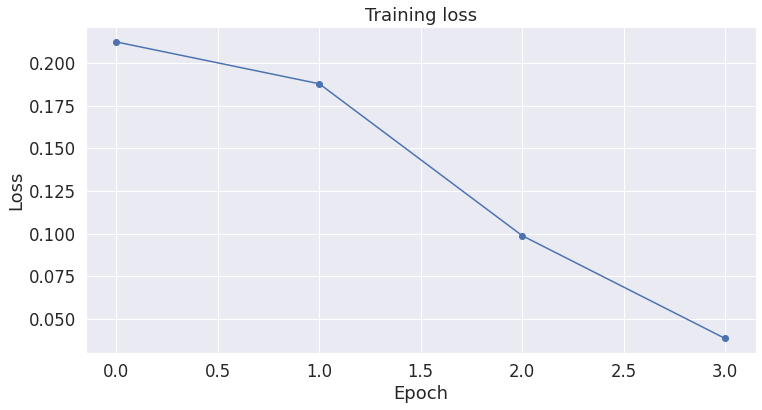

In [241]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

# Perform on Test

In [242]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/Test.csv")

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
anger = df[['clean_text','anger']]

#tentative = df[['clean_text','tentative']]
#analytical = df[['clean_text','analytical']]
#sadness = df[['clean_text','sadness']]
#confident = df[['clean_text','confident']]
#joy = df[['clean_text','joy']]
#fear = df[['clean_text','fear']]

Number of test sentences: 500



In [243]:
anger.anger = [np.nan_to_num(x) for x in anger['anger']]

#tentative.tentative = [np.nan_to_num(x) for x in tentative['tentative']]
#analytical.analytical = [np.nan_to_num(x) for x in analytical['analytical']]
#sadness.sadness = [np.nan_to_num(x) for x in sadness['sadness']]
#confident.confident = [np.nan_to_num(x) for x in confident['confident']]
#joy.joy = [np.nan_to_num(x) for x in joy['joy']]
#fear.fear = [np.nan_to_num(x) for x in fear['fear']]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [244]:
anger = anger.astype({"anger": int})

#tentative = tentative.astype({"tentative": int})
#analytical = analytical.astype({"analytical": int})
#sadness = sadness.astype({"sadness": int})
#confident = confident.astype({"confident": int})
#joy = joy.astype({"joy": int})
#fear = fear.astype({"fear": int})

In [245]:
# Create sentence and label lists
sentences = anger.clean_text.values
labels = anger.anger.values

#sentences = tentative.clean_text.values
#labels = tentative.tentative.values

#sentences = analytical.clean_text.values
#labels = analytical.analytical.values

#sentences = sadness.clean_text.values
#labels = sadness.sadness.values

#sentences = confident.clean_text.values
#labels = confident.confident.values

#sentences = joy.clean_text.values
#labels = joy.joy.values

#sentences = fear.clean_text.values
#labels = fear.fear.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [246]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 500 test sentences...
    DONE.


In [247]:
print('Positive samples: %d of %d (%.2f%%)' % (anger.anger.sum(), len(anger.anger), (anger.anger.sum() / len(anger.anger) * 100.0)))

#print('Positive samples: %d of %d (%.2f%%)' % (tentative.tentative.sum(), len(tentative.tentative), (tentative.tentative.sum() / len(tentative.tentative) * 100.0)))
#print('Positive samples: %d of %d (%.2f%%)' % (analytical.analytical.sum(), len(analytical.analytical), (analytical.analytical.sum() / len(analytical.analytical) * 100.0)))
#print('Positive samples: %d of %d (%.2f%%)' % (sadness.sadness.sum(), len(sadness.sadness), (sadness.sadness.sum() / len(sadness.sadness) * 100.0)))
#print('Positive samples: %d of %d (%.2f%%)' % (confident.confident.sum(), len(confident.confident), (confident.confident.sum() / len(confident.confident) * 100.0)))
#print('Positive samples: %d of %d (%.2f%%)' % (joy.joy.sum(), len(joy.joy), (joy.joy.sum() / len(joy.joy) * 100.0)))
#print('Positive samples: %d of %d (%.2f%%)' % (fear.fear.sum(), len(fear.fear), (fear.fear.sum() / len(fear.fear) * 100.0)))

Positive samples: 22 of 500 (4.40%)


In [248]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [249]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.587


## Output Test Results

In [250]:
frames = [flat_true_labels, flat_predictions]

In [251]:
table = pd.DataFrame(frames)

In [252]:
results = table.T
results.columns =['True', 'Pred'] 
results.head()

,True,Pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [253]:
table_to_save = anger.merge(results, left_index=True, right_index=True)

#table_to_save = tentative.merge(results, left_index=True, right_index=True)
#table_to_save = analytical.merge(results, left_index=True, right_index=True)
#table_to_save = sadness.merge(results, left_index=True, right_index=True)
#table_to_save = confident.merge(results, left_index=True, right_index=True)
#table_to_save = joy.merge(results, left_index=True, right_index=True)
#table_to_save = fear.merge(results, left_index=True, right_index=True)

In [254]:
table_to_save.to_csv('testing_data_results.csv')

# Label Other Tweets

In [255]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/content/drive/My Drive/DS_week8/BERT/covid2019_BERT_cleans.csv")

# Report the number of sentences.
print('Number of unlabeled sentences: {:,}\n'.format(df.shape[0]))
analytical_1 = df[['clean_text']]

Number of unlabeled sentences: 3,107



In [256]:
# Create sentence and label lists
sentences = analytical_1.clean_text.values
# labels = sadness.sadness.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
# prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 16  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [257]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions  = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  # label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  # true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 3,107 test sentences...
    DONE.


In [258]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [259]:
table1 = pd.DataFrame(flat_predictions)
table1.columns = ['pred_anger']

#table1.columns = ['pred_tentative']
#table1.columns = ['pred_analytical']
#table1.columns = ['pred_sadness']
#table1.columns = ['pred_confident']
#table1.columns = ['pred_joy']
#table1.columns = ['pred_fear']


df1 = df[['text', 'timestamp', 'clean_text']]

In [260]:
pred_output1 = df1.merge(table1,left_index=True, right_index=True)
pred_output1.to_csv('data_test_0324_0408_anger_lite.csv')

#pred_output1.to_csv('data_test_0324_0408_tentative_lite.csv')
#pred_output1.to_csv('data_test_0324_0408_analytical_lite.csv')
#pred_output1.to_csv('data_test_0324_0408_sadness_lite.csv')
#pred_output1.to_csv('data_test_0324_0408_confident_lite.csv')
#pred_output1.to_csv('data_test_0324_0408_joy_lite.csv')
#pred_output1.to_csv('data_test_0324_0408_fear_lite.csv')

In [261]:
len(pred_output1)

3107